In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
%matplotlib inline
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

In [3]:
customers=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/ End to End Case Study Analytics Project /CUSTOMERS.csv')
geo_loc=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/ End to End Case Study Analytics Project /GEO_LOCATION.csv')
order_items=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/ End to End Case Study Analytics Project /ORDER_ITEMS.csv')
order_payment=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/ End to End Case Study Analytics Project /ORDER_PAYMENTS.csv')
order_review=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/ End to End Case Study Analytics Project /ORDER_REVIEW_RATINGS.csv')
sellers=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/ End to End Case Study Analytics Project /SELLERS.csv')
orders=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/ End to End Case Study Analytics Project /ORDERS.csv')
products=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/ End to End Case Study Analytics Project /PRODUCTS.csv')

In [5]:
customers.drop_duplicates(subset=['customer_unique_id'],keep='first',ignore_index=True,inplace=True)
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
96091,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
96092,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
96093,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
96094,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [6]:
geo_loc.drop_duplicates(subset=['geolocation_zip_code_prefix'],keep='first',ignore_index=True,inplace=True)
geo_loc

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...
19010,99955,-28.107588,-52.144019,Ghaziabad,Uttar Pradesh
19011,99970,-28.345143,-51.876926,Vadugapatti,Tamil Nadu
19012,99910,-27.863500,-52.084760,Akkarampalle,Andhra Pradesh
19013,99920,-27.858716,-52.300403,Kolkata,West Bengal


In [8]:
aa=pd.merge(left=orders,right=order_items,left_on='order_id',right_on='order_id')
order_metrics=pd.merge(left=aa,right=order_payment,left_on='order_id',right_on='order_id')
order_metrics.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76,1,UPI,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,8/13/2018 8:55,159.90,19.22,1,credit_card,3,179.12


In [9]:
order_metrics.sort_values(by=["order_id","order_item_id","payment_sequential"],ascending=[True,False,False]).drop_duplicates(subset = ["order_id"])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
100690,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,9/13/2017 8:59,9/13/2017 9:45,9/19/2017 18:34,9/20/2017 23:43,9/29/2017 0:00,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29,1,credit_card,2,72.19
84871,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,4/26/2017 10:53,4/26/2017 11:05,5/4/2017 14:35,5/12/2017 16:04,5/15/2017 0:00,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93,1,credit_card,3,259.83
7361,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,1/14/2018 14:33,1/14/2018 14:48,1/16/2018 12:36,1/22/2018 13:19,2/5/2018 0:00,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87,1,credit_card,5,216.87
26602,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,8/8/2018 10:00,8/8/2018 10:10,8/10/2018 13:28,8/14/2018 13:32,8/20/2018 0:00,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79,1,credit_card,2,25.78
6126,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2/4/2017 13:57,2/4/2017 14:10,2/16/2017 9:46,3/1/2017 16:42,3/17/2017 0:00,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14,1,credit_card,3,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93898,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,4/23/2018 13:57,4/25/2018 4:11,4/25/2018 12:09,5/10/2018 22:56,5/18/2018 0:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41,1,UPI,1,343.40
82797,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,7/14/2018 10:26,7/17/2018 4:31,7/17/2018 8:05,7/23/2018 20:31,8/1/2018 0:00,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53,1,UPI,1,386.53
62271,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,10/23/2017 17:07,10/24/2017 17:14,10/26/2017 15:13,10/28/2017 12:22,11/10/2017 0:00,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95,1,credit_card,3,116.85
70680,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,8/14/2017 23:02,8/15/2017 0:04,8/15/2017 19:02,8/16/2017 21:59,8/25/2017 0:00,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72,1,credit_card,3,64.71


### 1. Perform Detailed exploratory analysis
### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…) 

In [10]:
#Total Revenue

In [11]:
price=order_metrics.sort_values(by=['order_id']).drop_duplicates(subset=['order_id']).price.sum()

In [12]:
freight=order_metrics.sort_values(by=['order_id']).drop_duplicates(subset=['order_id']).freight_value.sum()

In [13]:
(price+freight)

14413885.940000001

In [14]:
#Total Quantity

In [15]:
Total_qty=order_metrics.sort_values(by=['order_id']).drop_duplicates(subset=['order_id']).order_id.count()
Total_qty

98665

In [16]:
#Total Products

In [17]:
Tot_prod=order_metrics.sort_values(by=['product_id']).drop_duplicates(subset=['product_id']).product_id.count()
Tot_prod

32951

In [18]:
#Total categories

In [19]:
products.product_category_name.nunique()

71

In [20]:
#Total sellers

In [21]:
sellers.seller_id.nunique()

3095

In [23]:
#Total locations

In [25]:
geo_loc.geolocation_zip_code_prefix.nunique()

19015

In [26]:
#Total payment methods

In [27]:
order_metrics.payment_type.nunique()

4

In [ ]:
#Total channels

In [188]:
order_metrics.payment_sequential.nunique()

16

### b. Understanding how many new customers acquired every month

In [28]:
aa

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,8/13/2018 8:55,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,11/23/2017 19:45,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2/19/2018 20:31,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2/12/2018 13:10,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,9/5/2017 15:04,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,1/12/2018 21:36,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,1/12/2018 21:36,179.99,40.59


In [29]:
order_metrics['order_purchase_timestamp']=pd.to_datetime(order_metrics['order_purchase_timestamp'],format='%m/%d/%Y %H:%M')

In [30]:
order_metrics['cust_type']=np.where(order_metrics['customer_id'].duplicated(),'Existing_cust','New_customer')

In [31]:
new=order_metrics.loc[order_metrics['cust_type']=='New_customer','cust_type']

In [32]:
new_cust=order_metrics.pivot_table(index=[order_metrics.order_purchase_timestamp.dt.month,order_metrics.order_purchase_timestamp.dt.year],columns=new,values='order_id',aggfunc='count')
new_cust

cust_type                                          New_customer
order_purchase_timestamp order_purchase_timestamp              
1                        2017                               789
                         2018                              7220
2                        2017                              1733
                         2018                              6694
3                        2017                              2641
                         2018                              7188
4                        2017                              2391
                         2018                              6934
5                        2017                              3660
                         2018                              6853
6                        2017                              3217
                         2018                              6160
7                        2017                              3969
                         2018                              6273
8                        2017                              4293
                         2018                              6452
9                        2016                                 2
                         2017                              4243
                         2018                                 1
10                       2016                               308
                         2017                              4568
11                       2017                              7451
12                       2016                                 1
                         2017                              5624

### c. Understand the retention of customers on month on month basis

In [33]:
existing=order_metrics.loc[order_metrics['cust_type']=='Existing_cust','cust_type']

In [34]:
existing_cust=order_metrics.pivot_table(index=[order_metrics.order_purchase_timestamp.dt.month,order_metrics.order_purchase_timestamp.dt.year],columns=existing,values='order_id',aggfunc='count')
existing_cust

cust_type                                          Existing_cust
order_purchase_timestamp order_purchase_timestamp               
1                        2017                                216
                         2018                               1325
2                        2017                                329
                         2018                               1228
3                        2017                                540
                         2018                               1356
4                        2017                                464
                         2018                               1327
5                        2017                                736
                         2018                               1368
6                        2017                                564
                         2018                               1230
7                        2017                                871
                         2018                               1058
8                        2017                                877
                         2018                               1010
9                        2016                                  1
                         2017                                856
10                       2016                                 73
                         2017                               1002
11                       2017                               1565
12                       2017                                940

### d. How the revenues from existing/new customers on month on month basis

In [35]:
order_metrics

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,cust_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,1,credit_card,1,18.12,New_customer
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,3,voucher,1,2.00,Existing_cust
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,2,voucher,1,18.59,Existing_cust
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76,1,UPI,1,141.46,New_customer
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,8/13/2018 8:55,159.90,19.22,1,credit_card,3,179.12,New_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2/12/2018 13:10,174.90,20.10,1,credit_card,3,195.00,New_customer
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,9/5/2017 15:04,205.99,65.02,1,credit_card,5,271.01,New_customer
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,1/12/2018 21:36,179.99,40.59,1,credit_card,4,441.16,New_customer
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,1/12/2018 21:36,179.99,40.59,1,credit_card,4,441.16,Existing_cust


In [36]:
order_metrics['Revenue']=order_metrics['price']+order_metrics['freight_value']

In [37]:
order_metrics.pivot_table(index=[order_metrics.order_purchase_timestamp.dt.month,order_metrics.order_purchase_timestamp.dt.year],columns=order_metrics['cust_type'],values='Revenue',aggfunc='sum')

cust_type                                          Existing_cust  New_customer
order_purchase_timestamp order_purchase_timestamp                             
1                        2017                           23373.49     123082.05
                         2018                          144209.38    1006927.93
2                        2017                           37948.70     264281.67
                         2018                          132116.57     895666.29
3                        2017                           60009.98     397772.31
                         2018                          151548.46    1052994.68
4                        2017                           68978.93     379763.85
                         2018                          141643.61    1056929.42
5                        2017                           92731.20     537358.68
                         2018                          157171.83    1035340.64
6                        2017                           58287.02     468208.89
                         2018                          144819.74     929936.34
7                        2017                           95982.74     531330.07
                         2018                          131196.91     964119.03
8                        2017                           92969.07     607608.50
                         2018                          114084.63     924206.41
9                        2016                              64.57        146.72
                         2017                          119235.61     644716.34
                         2018                                NaN        166.46
10                       2016                            7104.99      51445.04
                         2017                          110228.21     693990.45
11                       2017                          167454.20    1054380.62
12                       2016                                NaN         19.62
                         2017                           93792.21     801199.79

### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [38]:
#trends/seasonality of sales

<AxesSubplot:xlabel='order_purchase_timestamp,order_purchase_timestamp'>

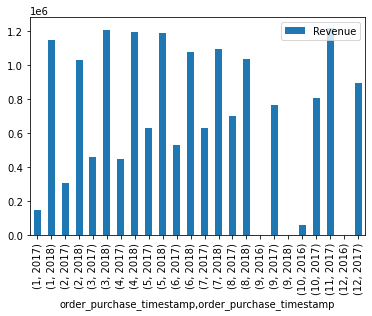

In [39]:
trends=order_metrics.pivot_table(index=[order_metrics.order_purchase_timestamp.dt.month,order_metrics.order_purchase_timestamp.dt.year],values='Revenue',aggfunc='sum')

trends.plot(kind='bar')

In [40]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
96091,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
96092,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
96093,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
96094,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [41]:
#quantity by category

In [42]:
order_prod=pd.merge(left=order_items,right=products,on='product_id')

In [43]:
order_prod

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,7/5/2017 2:44,55.9,17.96,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5/23/2018 10:56,64.9,18.33,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/7/2017 18:55,58.9,16.17,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/16/2017 22:05,58.9,13.29,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,7/18/2018 20:23,129.9,51.20,Garden_Tools,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,8/21/2018 10:10,99.0,13.52,Furniture_Decor,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,6/7/2017 17:05,736.0,20.91,Watches_Gifts,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,12/22/2017 17:31,229.9,44.02,Sports_Leisure,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [44]:
order_prod.sort_values(by=['order_id']).drop_duplicates(subset=['order_id']).groupby('product_category_name')['order_id'].count().reset_index().sort_values(by='order_id',ascending=False).rename(columns={'product_category_name':'Category','order_id':'Quantity'})


,Category,Quantity
7,Bed_Bath_Table,9321
43,Health_Beauty,8805
65,Sports_Leisure,7683
15,Computers_Accessories,6661
39,Furniture_Decor,6342
...,...,...
3,Arts_And_Craftmanship,22
52,La_Cuisine,13
11,Cds_Dvds_Musicals,12
29,Fashion_Childrens_Clothes,6


In [45]:
#quantity by location,month,week,day,time,channel,payment method

In [46]:
order_metrics.drop_duplicates(subset=['order_id'],keep='first',ignore_index=True,inplace=True)

In [48]:
orders.drop_duplicates(subset=['order_id'],keep='first',ignore_index=True,inplace=True)
order_cust=pd.merge(left=customers,right=orders,on='customer_id')
order_cust['order_purchase_timestamp']=pd.to_datetime(order_cust['order_purchase_timestamp'],format='%m/%d/%Y %H:%M')


In [49]:
order_cust.groupby(['customer_city'])['order_id'].count().reset_index().sort_values(by=['order_id'],ascending=False).rename(columns={'customer_city':'Location','order_id':'Quantity'})

,Location,Quantity
55,Akkarampalle,14971
284,Badepalle,6611
148,Anantapur,2671
1099,Eddumailaram,2066
142,Anakapalle,1462
...,...,...
2358,Mangrulpir,1
2355,Manglaur,1
2349,Mangadu,1
277,Badagoan,1


In [50]:
order_cust.groupby(order_cust.order_purchase_timestamp.dt.month)['order_id'].count().reset_index().sort_values(by=['order_purchase_timestamp'],ascending=True).rename(columns={'order_purchase_timestamp':'Month','order_id':'Quantity'})

,Month,Quantity
0,1,7778
1,2,8191
2,3,9596
3,4,9069
4,5,10211
5,6,9116
6,7,9981
7,8,10492
8,9,4101
9,10,4765


In [51]:
order_cust.groupby(order_cust.order_purchase_timestamp.dt.week)['order_id'].count().reset_index().sort_values(by=['order_purchase_timestamp'],ascending=True).rename(columns={'order_purchase_timestamp':'Week','order_id':'Quantity'})

,Week,Quantity
0,1,1369
1,2,1801
2,3,1877
3,4,1880
4,5,1998
5,6,2053
6,7,1971
7,8,2053
8,9,2305
9,10,2156


In [52]:
order_cust.groupby(order_cust.order_purchase_timestamp.dt.day)['order_id'].count().reset_index().sort_values(by=['order_purchase_timestamp'],ascending=True).rename(columns={'order_purchase_timestamp':'day','order_id':'Quantity'})

,day,Quantity
0,1,2982
1,2,3136
2,3,3145
3,4,3360
4,5,3302
5,6,3359
6,7,3255
7,8,3230
8,9,3172
9,10,3064


In [53]:
order_cust.groupby(order_cust.order_purchase_timestamp.dt.time)['order_id'].count().reset_index().sort_values(by=['order_purchase_timestamp'],ascending=True).rename(columns={'order_purchase_timestamp':'Time','order_id':'Quantity'})

,Time,Quantity
0,00:00:00,39
1,00:01:00,52
2,00:02:00,34
3,00:03:00,58
4,00:04:00,57
...,...,...
1426,23:55:00,61
1427,23:56:00,59
1428,23:57:00,50
1429,23:58:00,48


In [54]:
order_metrics.groupby('payment_type')['order_id'].count().reset_index().sort_values(by=['order_id'],ascending=True).rename(columns={'payment_type':'Payment_type','order_id':'Quantity'})

,Payment_type,Quantity
2,debit_card,1520
3,voucher,2648
0,UPI,19614
1,credit_card,74883


In [190]:
order_metrics.groupby('payment_sequential')['order_id'].count().reset_index().sort_values(by=['order_id'],ascending=False)

,payment_sequential,order_id
0,1,97048
1,2,1344
2,3,149
3,4,51
4,5,24
5,6,20
6,7,9
7,8,7
9,10,5
10,11,2


### f. Popular Products by month, seller, state, category.

In [55]:
order_prod['shipping_limit_date']=pd.to_datetime(order_prod['shipping_limit_date'],format='%m/%d/%Y %H:%M')

In [191]:
order_prod.product_id.value_counts().reset_index()

,index,product_id
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,488
2,422879e10f46682990de24d770e7f83d,484
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,388
...,...,...
32946,4c809e61a89993ebeb2ad634b8af3c15,1
32947,8b10d9525f4806f9a1e9d1665506ab4f,1
32948,851e00fe0c1176f5bfc7ddddb3c8021f,1
32949,20c26b058070cf8c6bbb8c8943eea98c,1


In [57]:
#by month

In [58]:
data = pd.DataFrame()
for i in range(0,13):
    a = pd.DataFrame((order_prod[order_prod.shipping_limit_date.dt.month == i].groupby("product_id").shipping_limit_date.count()).reset_index().sort_values(by = "shipping_limit_date",ascending = False).head(1).product_id)
    data = pd.concat([data,a])
    

In [59]:
data['Month']=[1,2,3,4,5,6,7,8,9,10,11,12]

In [60]:
data.rename(columns={'product_id':'Popular_product'}).reset_index(drop=True)

,Popular_product,Month
0,aca2eb7d00ea1a7b8ebd4e68314663af,1
1,368c6c730842d78016ad823897a372db,2
2,aca2eb7d00ea1a7b8ebd4e68314663af,3
3,aca2eb7d00ea1a7b8ebd4e68314663af,4
4,53b36df67ebb7c41585e8d54d6772e08,5
5,99a4788cb24856965c36a24e339b6058,6
6,99a4788cb24856965c36a24e339b6058,7
7,e7cc48a9daff5436f63d3aad9426f28b,8
8,f1c7f353075ce59d8a6f3cf58f419c9c,9
9,422879e10f46682990de24d770e7f83d,10


In [61]:
#by seller

In [62]:
order_prod.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.9,13.29,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:00,55.9,17.96,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:00,64.9,18.33,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:00,58.9,16.17,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:00,58.9,13.29,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [63]:
order_prod.groupby('product_id')['seller_id'].count().sort_values(ascending=False).reset_index()

,product_id,seller_id
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,488
2,422879e10f46682990de24d770e7f83d,484
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,388
...,...,...
32946,6ca99f05e9c1952a6597264e87f01378,1
32947,6ca54e191592a843087a042b0665d7ef,1
32948,6ca5428af5edb5066b1966ad58501b60,1
32949,6ca32b4631431cb1fe976880797a0f5c,1


In [64]:
#by state

In [65]:
cust=customers.loc[:,['customer_id','customer_state']]

In [66]:
cust_order=pd.merge(left=cust,right=orders,on='customer_id')
cust_prod=pd.merge(left=cust_order,right=order_prod,on='order_id')

In [67]:
cust_prod

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,1,...,124.99,21.88,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,1/12/2018 20:48,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1,...,289.00,46.48,Housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5/19/2018 16:07,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,1,...,139.94,17.79,Office_Furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,3/13/2018 16:06,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,1,...,149.94,23.36,Office_Furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,7/29/2018 9:51,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,1,...,230.00,22.25,Home_Confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108596,17ddf5dd5d51696bb3d7c6291687be6f,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,4/7/2018 15:48,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,1,...,74.90,13.88,Books_General_Interest,51.0,489.0,2.0,611.0,22.0,22.0,23.0
108597,e7b71a9017aa05c9a7fd292d714858e8,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,4/4/2018 8:20,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,1,...,114.90,14.16,Sports_Leisure,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0
108598,5e28dfe12db7fb50a4b2f691faecea5e,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,4/8/2018 20:11,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,1,...,37.00,19.04,Health_Beauty,60.0,575.0,1.0,870.0,25.0,20.0,18.0
108599,56b18e2166679b8a959d72dd06da27f9,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,11/3/2017 21:08,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,1,...,689.00,22.07,Watches_Gifts,59.0,452.0,1.0,710.0,19.0,13.0,14.0


In [68]:
cust_order.customer_state.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Chhattisgarh', 'Delhi',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Orissa',
       'Punjab', 'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh',
       'Uttaranchal', 'West Bengal', 'Goa'], dtype=object)

In [69]:
mm=pd.DataFrame()
for i in cust_prod.customer_state.unique():
    b=cust_prod.loc[cust_prod.customer_state==i].groupby(['product_id','customer_state']).order_id.count().reset_index().sort_values(by = "order_id",ascending = False).head(1)
    mm=pd.concat([mm,b])   

In [70]:
mm

,product_id,customer_state,order_id
15914,aca2eb7d00ea1a7b8ebd4e68314663af,Andhra Pradesh,340
9,03e1c946c0ddfc58724ff262aef08dff,Arunachal Pradesh,12
1163,422879e10f46682990de24d770e7f83d,Chhattisgarh,40
859,53759a2ecddad2bb87a079a1f1519f73,Delhi,21
3375,aca2eb7d00ea1a7b8ebd4e68314663af,Gujarat,45
340,2b4609f8948be18874494203496bc318,Haryana,13
183,422879e10f46682990de24d770e7f83d,Himachal Pradesh,6
279,368c6c730842d78016ad823897a372db,Jammu & Kashmir,10
732,422879e10f46682990de24d770e7f83d,Karnataka,24
858,aca2eb7d00ea1a7b8ebd4e68314663af,Kerala,13


In [71]:
#by category

In [72]:
cust_prod.groupby(['product_category_name']).product_id.count().reset_index().sort_values(by='product_id',ascending=False)

,product_category_name,product_id
7,Bed_Bath_Table,10513
43,Health_Beauty,9379
65,Sports_Leisure,8272
39,Furniture_Decor,7860
15,Computers_Accessories,7541
...,...,...
3,Arts_And_Craftmanship,21
11,Cds_Dvds_Musicals,14
52,La_Cuisine,13
29,Fashion_Childrens_Clothes,8


### g. Popular categories by state, month

In [73]:
#by state

In [74]:
m=pd.DataFrame()
for i in cust_prod.customer_state.unique():
    bm=cust_prod.loc[cust_prod.customer_state==i].groupby(['product_category_name','customer_state']).product_id.count().reset_index().sort_values(by = "product_id",ascending = False).head(1)
    m = pd.concat([mm,b])
     

In [75]:
m.rename(columns={'order_id':'Count'})

,product_id,customer_state,Count
15914,aca2eb7d00ea1a7b8ebd4e68314663af,Andhra Pradesh,340
9,03e1c946c0ddfc58724ff262aef08dff,Arunachal Pradesh,12
1163,422879e10f46682990de24d770e7f83d,Chhattisgarh,40
859,53759a2ecddad2bb87a079a1f1519f73,Delhi,21
3375,aca2eb7d00ea1a7b8ebd4e68314663af,Gujarat,45
340,2b4609f8948be18874494203496bc318,Haryana,13
183,422879e10f46682990de24d770e7f83d,Himachal Pradesh,6
279,368c6c730842d78016ad823897a372db,Jammu & Kashmir,10
732,422879e10f46682990de24d770e7f83d,Karnataka,24
858,aca2eb7d00ea1a7b8ebd4e68314663af,Kerala,13


In [76]:
#by month

In [77]:
dat=pd.DataFrame()
for i in range(0,13):
    ab = pd.DataFrame((order_prod[order_prod.shipping_limit_date.dt.month == i].groupby("product_category_name").shipping_limit_date.count()).reset_index().sort_values(by = "shipping_limit_date",ascending = False).head(1).product_category_name)
    dat= pd.concat([dat,ab])
    

In [78]:
dat['Month']=[1,2,3,4,5,6,7,8,9,10,11,12]
dat

,product_category_name,Month
35,Furniture_Decor,1
13,Computers_Accessories,2
12,Computers_Accessories,3
7,Bed_Bath_Table,4
43,Health_Beauty,5
6,Bed_Bath_Table,6
7,Bed_Bath_Table,7
7,Bed_Bath_Table,8
6,Bed_Bath_Table,9
6,Bed_Bath_Table,10


### h. List top 10 most expensive products sorted by price

In [79]:
prod_items=pd.merge(left=products,right=order_items,on='product_id')

In [80]:
prod_items.groupby('product_id').price.sum().reset_index().sort_values(by='price',ascending=False).head(10)

,product_id,price
24086,bb50f2e236e5eea0100680137654686c,63885.00
14068,6cdd53843498f92890544667809f1595,54730.20
27613,d6160fb7873f184099d9bc95e30376af,48899.34
27039,d1c427060a0f73f6b889a5c7c61f2ac4,47214.51
19742,99a4788cb24856965c36a24e339b6058,43025.56
8051,3dd2a17168ec895c781a9191c1e95ad7,41082.60
4996,25c38557cf793876c5abdd5931f922db,38907.32
12351,5f504b3a1c75b73d6151be81eb05bdc9,37733.90
10867,53b36df67ebb7c41585e8d54d6772e08,37683.42
22112,aca2eb7d00ea1a7b8ebd4e68314663af,37608.90


### 2. Performing Customers/sellers Segmentation

### a. Divide the customers into groups based on the revenue generated 

In [84]:
order_metrics['Revenue_cat']=pd.qcut(order_metrics.Revenue,3,labels=['low','medium','High'])

In [86]:
order_metrics['Revenue_cat'].value_counts()

low       32911
High      32886
medium    32868
Name: Revenue_cat, dtype: int64

In [87]:
order_metrics.groupby(['Revenue_cat'])['customer_id'].count()

Revenue_cat
low       32911
medium    32868
High      32886
Name: customer_id, dtype: int64

### b. Divide the sellers into groups based on the revenue generated 

In [100]:
low=order_metrics.loc[order_metrics.Revenue_cat=='low','seller_id']
medium=order_metrics.loc[order_metrics.Revenue_cat=='medium','seller_id']
high=order_metrics.loc[order_metrics.Revenue_cat=='high','seller_id']

### 3. Cross-Selling (Which products are selling together)

In [125]:
d=pd.merge(left=orders,right=order_items,left_on='order_id',right_on='order_id')
order_met=pd.merge(left=aa,right=order_payment,left_on='order_id',right_on='order_id')
order_met['Revenue']=order_metrics['price']+order_metrics['freight_value']
order_met

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,Revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,1,credit_card,1,18.12,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,3,voucher,1,2.00,141.46
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,2,voucher,1,18.59,179.12
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76,1,UPI,1,141.46,72.20
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,8/13/2018 8:55,159.90,19.22,1,credit_card,3,179.12,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2/12/2018 13:10,174.90,20.10,1,credit_card,3,195.00,NaN
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,9/5/2017 15:04,205.99,65.02,1,credit_card,5,271.01,NaN
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,1/12/2018 21:36,179.99,40.59,1,credit_card,4,441.16,NaN
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,1/12/2018 21:36,179.99,40.59,1,credit_card,4,441.16,NaN


In [133]:
gg=order_met.loc[order_met.order_id.isin(order_met.loc[order_met.order_id.duplicated()].order_id.unique())]
gg

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,Revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,1,credit_card,1,18.12,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,3,voucher,1,2.00,141.46
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,2,voucher,1,18.59,179.12
11,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,7/29/2017 11:55,7/29/2017 12:05,8/10/2017 19:45,8/16/2017 17:14,8/23/2017 0:00,1,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,8/11/2017 12:05,149.99,19.77,2,voucher,1,161.42,114.13
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,7/29/2017 11:55,7/29/2017 12:05,8/10/2017 19:45,8/16/2017 17:14,8/23/2017 0:00,1,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,8/11/2017 12:05,149.99,19.77,1,credit_card,1,8.34,50.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117591,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,10/4/2017 19:57,10/4/2017 20:07,10/5/2017 16:52,10/20/2017 20:25,11/7/2017 0:00,2,49d2e2460386273b195e7e59b43587c3,1caf283236cd69af44cbc09a0a1e7d32,10/10/2017 20:07,26.90,36.98,2,voucher,1,64.37,NaN
117592,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,1/27/2017 0:30,1/27/2017 1:05,1/30/2017 11:40,2/7/2017 13:15,3/17/2017 0:00,1,9fc063fd34fed29ccc57b7f8e8d03388,ccc4bbb5f32a6ab2b7066a4130f114e3,2/3/2017 0:30,370.00,19.43,2,voucher,1,250.00,NaN
117593,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,1/27/2017 0:30,1/27/2017 1:05,1/30/2017 11:40,2/7/2017 13:15,3/17/2017 0:00,1,9fc063fd34fed29ccc57b7f8e8d03388,ccc4bbb5f32a6ab2b7066a4130f114e3,2/3/2017 0:30,370.00,19.43,1,credit_card,5,139.43,NaN
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,1/12/2018 21:36,179.99,40.59,1,credit_card,4,441.16,NaN


In [131]:
cross_sell = gg.loc[~gg.loc[:,["order_id","seller_id","product_id"]].duplicated(keep = False)]["product_id"].unique()

In [132]:
order_met.loc[order_met.product_id.isin(cross_sell)].groupby("product_id").Revenue.sum().reset_index().sort_values(by = "Revenue",ascending = False).head(10)

,product_id,Revenue
2969,aca2eb7d00ea1a7b8ebd4e68314663af,67292.21
1122,422879e10f46682990de24d770e7f83d,66815.50
2632,99a4788cb24856965c36a24e339b6058,66378.59
970,389d119b48cf3043d311335e499d9c6b,55602.27
1447,53759a2ecddad2bb87a079a1f1519f73,46503.11
1453,53b36df67ebb7c41585e8d54d6772e08,44782.75
933,368c6c730842d78016ad823897a372db,43306.70
3620,d1c427060a0f73f6b889a5c7c61f2ac4,37920.23
362,154e7e31ebfa092203795c972e5804a6,37591.66
737,2b4609f8948be18874494203496bc318,34150.17


### 4. Payment Behaviour

### a. How customers are paying?

In [140]:
order_metrics.groupby('payment_type')['order_id'].count().reset_index()

,payment_type,order_id
0,UPI,19614
1,credit_card,74883
2,debit_card,1520
3,voucher,2648


### b. Which payment channels are used by most customers?

In [141]:
order_metrics.groupby('payment_sequential')['order_id'].count().reset_index()

,payment_sequential,order_id
0,1,97048
1,2,1344
2,3,149
3,4,51
4,5,24
5,6,20
6,7,9
7,8,7
8,9,1
9,10,5


### 5. Customer satisfaction towards category & product

### a. Which categories (top 10) are maximum rated & minimum rated?

In [143]:
order_review

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29


In [147]:
prod_review=pd.merge(left=order_review,right=order_prod,on='order_id')

In [154]:
max_rated=prod_review.groupby('product_category_name')['review_score'].sum().reset_index().sort_values(by='review_score',ascending=False).head(10)
max_rated

,product_category_name,review_score
7,Bed_Bath_Table,43636
43,Health_Beauty,40121
65,Sports_Leisure,35616
39,Furniture_Decor,32716
15,Computers_Accessories,30953
49,Housewares,28235
70,Watches_Gifts,24016
68,Telephony,17907
42,Garden_Tools,17572
5,Auto,17193


In [153]:
min_rated=prod_review.groupby('product_category_name')['review_score'].sum().reset_index().sort_values(by='review_score',ascending=True).head(10)
min_rated                                                                                                                                  

,product_category_name,review_score
61,Security_And_Services,5
29,Fashion_Childrens_Clothes,36
52,La_Cuisine,53
11,Cds_Dvds_Musicals,65
3,Arts_And_Craftmanship,99
46,Home_Comfort_2,101
23,Diapers_And_Hygiene,127
32,Fashion_Sport,132
35,Flowers,139
41,Furniture_Mattress_And_Upholstery,145


### b. Which products (top10) are maximum rated & minimum rated?

In [155]:
max_rated_prod=prod_review.groupby('product_id')['review_score'].sum().reset_index().sort_values(by='review_score',ascending=False).head(10)
max_rated_prod

,product_id,review_score
22112,aca2eb7d00ea1a7b8ebd4e68314663af,2112
8613,422879e10f46682990de24d770e7f83d,1920
19742,99a4788cb24856965c36a24e339b6058,1896
7364,389d119b48cf3043d311335e499d9c6b,1612
7079,368c6c730842d78016ad823897a372db,1531
10840,53759a2ecddad2bb87a079a1f1519f73,1448
27039,d1c427060a0f73f6b889a5c7c61f2ac4,1432
10867,53b36df67ebb7c41585e8d54d6772e08,1348
2794,154e7e31ebfa092203795c972e5804a6,1264
8051,3dd2a17168ec895c781a9191c1e95ad7,1147


In [156]:
min_rated_prod=prod_review.groupby('product_id')['review_score'].sum().reset_index().sort_values(by='review_score',ascending=True).head(10)
min_rated_prod

,product_id,review_score
28884,e03071a2d2410c9ef2be47b508cac95f,1
23257,b56ff361e0733eebc1d010432936b706,1
16411,7ed8c74b7ad2f1790a24a24c071da537,1
8821,43c81702c9aca96af077286a5b2525b9,1
3940,1da4613d4f7e10e1554538b46dd16486,1
30580,ed9d81a5043f74cbe0e3db315770af45,1
10464,5096e827f6152df3974343e735a52dc9,1
3938,1da0fbb35cfdc9fcb6d48dfddca69513,1
3934,1d9c9e0532fb481c0f89c3b20cec62e6,1
18393,8ec6aedf40e1175c5446134c40931706,1


### c. Average rating by location, seller, product, category, month etc.

In [ ]:
#by location

In [160]:
cust_review=pd.merge(left=cust_order,right=order_review,on='order_id')

In [161]:
cust_review

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,88b8b52d46df026a9d1ad2136a59b30b,4,5/26/2017 0:00,5/30/2017 22:34
1,18955e83d337fd6b2def6b18a428ac77,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,1/12/2018 20:48,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,1/30/2018 0:00,2/10/2018 22:43
2,4e7b3e00288586ebd08712fdd0374a03,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5/19/2018 16:07,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,5ad6695d76ee186dc473c42706984d87,5,6/15/2018 0:00,6/15/2018 12:10
3,b2b6027bc5c5109e529d4dc6358b12c3,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,3/13/2018 16:06,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,059a801bb31f6aab2266e672cab87bc5,5,3/29/2018 0:00,4/2/2018 18:36
4,4f2d8ab171c80ec8364f7c12e35b23ad,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,7/29/2018 9:51,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,8490879d58d6c5d7773f2739a03f089a,5,8/10/2018 0:00,8/17/2018 1:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96407,17ddf5dd5d51696bb3d7c6291687be6f,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,4/7/2018 15:48,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,36e2cdbaa9f639b57c53b37ac798fee8,4,4/14/2018 0:00,4/28/2018 11:15
96408,e7b71a9017aa05c9a7fd292d714858e8,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,4/4/2018 8:20,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,b273b431c3aedb4eed18643309652940,5,4/12/2018 0:00,4/16/2018 10:36
96409,5e28dfe12db7fb50a4b2f691faecea5e,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,4/8/2018 20:11,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,fa4f16891e6b2edd1354668d07f5648b,1,5/4/2018 0:00,5/8/2018 1:41
96410,56b18e2166679b8a959d72dd06da27f9,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,11/3/2017 21:08,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,0bcdc9e450ea500811a8d39ee993cd47,5,11/17/2017 0:00,11/19/2017 23:34


In [165]:
cust_review.groupby('customer_state')['review_score'].mean().reset_index()

,customer_state,review_score
0,Andhra Pradesh,4.051374
1,Arunachal Pradesh,4.112132
2,Chhattisgarh,4.085997
3,Delhi,4.055228
4,Goa,4.800000
5,Gujarat,4.081144
6,Haryana,4.144127
7,Himachal Pradesh,4.030641
8,Jammu & Kashmir,4.081605
9,Karnataka,4.076201


In [ ]:
#by seller

In [172]:
seller_review=pd.merge(left=order_metrics,right=order_review,on='order_id')

In [177]:
seller_review.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'cust_type', 'Revenue',
       'Revenue_cat', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [174]:
seller_review.groupby('seller_id')['review_score'].mean().reset_index()

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.964824
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.882353
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3083,ffcfefa19b08742c5d315f2791395ee5,1.000000
3084,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.333333
3085,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3086,fffd5413c0700ac820c7069d66d98c89,3.982456


In [ ]:
#by product

In [175]:
seller_review.groupby('product_id')['review_score'].mean().reset_index()

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
31876,fff6177642830a9a94a0f2cba5e476d1,4.5
31877,fff81cc3158d2725c0655ab9ba0f712c,4.0
31878,fff9553ac224cec9d15d49f5a263411f,5.0
31879,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


In [ ]:
#by category

In [178]:
prod_review.groupby('product_category_name')['review_score'].mean().reset_index()

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.000000
1,Air_Conditioning,3.919192
2,Art,3.918660
3,Arts_And_Craftmanship,4.125000
4,Audio,3.808219
...,...,...
66,Stationery,4.181386
67,Tablets_Printing_Image,4.048193
68,Telephony,3.935604
69,Toys,4.138667


In [ ]:
#by month

In [184]:
order_review['review_answer_timestamp']=pd.to_datetime(order_review['review_answer_timestamp'],format='%m/%d/%Y %H:%M')

In [185]:
order_review['review_month']=order_review.review_answer_timestamp.dt.month

In [186]:
order_review

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,review_month
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,2018-01-18 21:46:00,1
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,2018-03-11 03:05:00,3
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2018-02-18 14:36:00,2
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,2017-04-21 22:02:00,4
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,2018-03-02 10:26:00,3
...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,2017-12-11 20:06:00,12
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,2018-03-23 09:10:00,3
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,2018-07-02 12:59:00,7
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,2017-12-16 01:29:00,12


In [187]:
order_review.groupby('review_month')['review_score'].mean().reset_index()

,review_month,review_score
0,1,4.035971
1,2,4.042689
2,3,3.812935
3,4,3.904175
4,5,4.147590
5,6,4.143146
6,7,4.231687
7,8,4.200392
8,9,4.197554
9,10,4.167262
